<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/covid_cover.png" />
</div>
</div>

**Combating Covid-19 Misinformation Using Natural Language Processing. How can we create a NLP Classification Model to detect whether an article, post, and tweet is in fact “real” or “fake”?**

**Please Note:** 
<br>

**This is notebook 3 of 6** - Each article and twitter dataset will have 3 notebooks each containing a 'Loading & Merging', 'Cleaning & EDA', and a 'Vectorizing and Modeling' notebook.

# TF-IDF (Uni - Bi - Tri Grams)

Let's use term frequency inverse document frequency to find the tokens that have the most weight in determining whether an article is real or fake.

In [4]:
# Importing libraries
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
# the python string package has a helpful punctuation list
import string
print(string.punctuation)
stemmer = nltk.stem.PorterStemmer()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Importing everything we need
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make our sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import itertools

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Word Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
stopwords = set(STOPWORDS)
from PIL import Image

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Tokenize Libraries
# Importing libraries
#import nltk import re
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Load in the Dataset**

In [6]:
CoAID_df = pd.read_csv('data/CoAID_df.csv')
CoAID_df

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,0,0,0,0,Facebook posts shared in at least three countr...,0,0,0,0,0,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,0,http://legis.wisconsin.gov/assembly/republican...,0,0,0,0,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,0,0,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,0,0,0,0,Facebook posts claim a child who is infected w...,0,0,0,0,0,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/kokernagnews/photos/a...,0,0,0,0,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,0,0,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/photo.php?fbid=102193...,0,0,0,0,"42 Democratic senators, plus two Independents,...",0,0,0,0,0,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,10078,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.themonitor.com/2020/10/05/kamala-h...,0,0,0,0,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,0,0,"""""",real
5453,10079,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.wral.com/cooper-forest-engage-in-l...,0,0,0,0,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,democratic gov. roy cooper and republican lt. ...,2020-10-14T18:47:00-04:00,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real
5454,10080,post,https://www.politifact.com/factchecks/2020/oct...,0,https://www.facebook.com/photo.php?fbid=402154...,0,0,0,0,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,0,0,"""""",real
5455,10081,post,https://www.politifact.com/factchecks/2020/sep...,0,https://twitter.com/SenChrisLarson/status/1308...,0,0,0,0,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,0,0,"""""",real


In [7]:
# tokenizer is a function
# input: single document/sentence
# output: list of tokens

# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuelgarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Uni Grams

In [8]:
titles = pd.DataFrame(CoAID_df['title'])
display(titles)

,title
0,Facebook posts shared in at least three countr...
1,Wisconsin is Òclearly seeing a decline in COVI...
2,Facebook posts claim a child who is infected w...
3,IndiaÕs Ministry of Home Affairs banning citiz...
4,"42 Democratic senators, plus two Independents,..."
...,...
5452,Says the “The Rio Grande Valley is 4.7% of the...
5453,"Georgia has “almost 100,000 more (COVID-19) ca..."
5454,“Wisconsin Republicans have not passed a singl...
5455,“(Republicans) have the power to overturn the ...


In [9]:
bagofwords = CountVectorizer().fit(titles["title"])
titles_transformed = bagofwords.transform(titles["title"])

titles_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=titles_transformed.toarray())
display(titles_df)

,000,02,03,03õ,054,06,10,100,10000,100000,...,ôcoronavirusõ,ôdemocrat,ôi,ôinfestationõ,ônewõ,ôresident,ôsamuel,ôvaccineõ,ôzyphr,õó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5453,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
tfidf = TfidfVectorizer().fit(titles["title"])
titles_transformed = tfidf.transform(titles["title"])

titles_df = pd.DataFrame(columns=tfidf.get_feature_names(), data=titles_transformed.toarray())
display(titles_df)

,000,02,03,03õ,054,06,10,100,10000,100000,...,ôcoronavirusõ,ôdemocrat,ôi,ôinfestationõ,ônewõ,ôresident,ôsamuel,ôvaccineõ,ôzyphr,õó
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5453,0.168352,0.0,0.0,0.0,0.0,0.0,0.0,0.197086,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5454,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The `sklearn` implementation uses a more complex IDF count, so we will not get into the math of these numbers, but it is very customizable so feel free to look at the documentation.

Notice that while for the `CountVectorizer` the word "absolutely" got a value of 1 for all three documents, the `TfidfVectorizer` gave it a higher value for a short review (it makes up a bigger part of that sentence).

Also notice that while for the `CountVectorizer`, the value for the word "period" is 1, the same value as for the words "movie", "beaten", and "have", the `TfidfVectorizer` gave it the highest value since it only appears in one document.

Now, looking at our article data:

In [11]:
# store simplified data in X and y
X = CoAID_df['title']
y = CoAID_df['label']

In [12]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train

518     The new coronavirus contains HIV ÒinsertionsÓ ...
4412    Interim Operational Considerations for Impleme...
32      Video shows an orangutan who started washing i...
3488    Discontinuation of Isolation for Persons with ...
4303    How CDC Determines the Level of a Country’s CO...
                              ...                        
3772    What a Lack of COVID-19 Testing Means for Chil...
5191       Back-to-School Means Changes in Teaching Plans
5226                         Can COVID-19 Cause Diabetes?
5390    Monitoring and Evaluation Checklist for K-12 S...
860     We can’t make a vaccine that works for flu, no...
Name: title, Length: 3656, dtype: object

In [14]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3656, 1000)

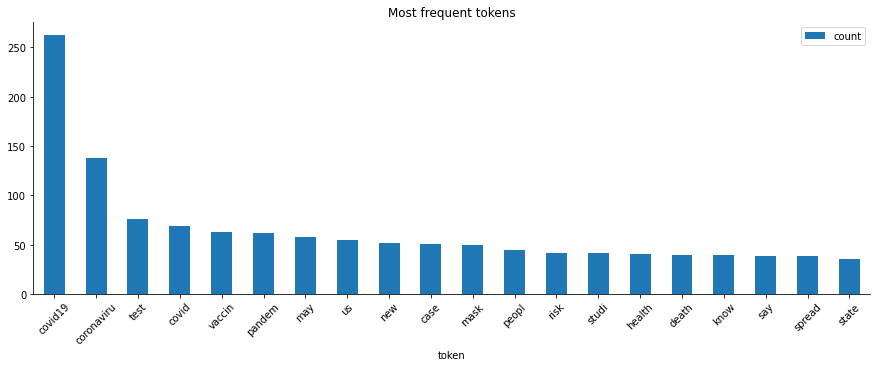

In [15]:
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    
words = tfidf.get_feature_names()
word_weights = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_weights)

## Bi Grams

In [16]:
# set up bigrams dataframe
Bi_titles_df = pd.DataFrame(CoAID_df['title'])

In [17]:
# Preprocessing
def remove_string_special_characters(s):

    # removes special characters with ' '
    stripped = re.sub('[^a-zA-z\s]', '', s)
    stripped = re.sub('_', '', stripped)

    # Change any white space to one space
    stripped = re.sub('\s+', ' ', stripped)

    # Remove start and end white spaces
    stripped = stripped.strip()
    if stripped != '':
        return stripped.lower()
    
# Stopword removal
stop_words = nltk.corpus.stopwords.words('english')
#stop_words.extend(newStopWords)
for i, line in enumerate(Bi_titles_df['title']):
    Bi_titles_df['title'][i] = ' '.join([
        x for x in nltk.word_tokenize(line)
        if (x not in stop_words)
    ])
    
# Get the bigrams 
vectorizer = CountVectorizer(ngram_range =(2, 2))
X1 = vectorizer.fit_transform(Bi_titles_df['title']) 
features = (vectorizer.get_feature_names())
print("\n\nX1 : \n", X1.toarray())
  
# Applying TFIDF
# You can still get n-grams here using the ngram range
vectorizer = TfidfVectorizer(ngram_range = (2, 2))
X2 = vectorizer.fit_transform(Bi_titles_df['title'])
scores = (X2.toarray())
print("\n\nScores : \n", scores)
  
# Get the top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                       term        rank
6050              covid 19  212.906760
19610             sars cov   27.393057
775             19 vaccine   23.593228
551            19 pandemic   23.251805
7760          during covid   22.722946
15613    novel coronavirus   17.710746
23836        united states   16.100912
5300       contact tracing   15.193177
217               19 cases   15.011835
5528   coronavirus disease   14.815877
25083            what know   14.606885
15301      new coronavirus   14.427360
20187         severe covid   13.158001
8598            face masks   12.593546
7182          disease 2019   12.437325
558            19 patients   12.317427
12250     interim guidance 

## Tri Grams

In [18]:
Tri_titles_df = pd.DataFrame(CoAID_df['title'])

In [19]:
Tri_titles_df

,title
0,Facebook posts shared in at least three countr...
1,Wisconsin is Òclearly seeing a decline in COVI...
2,Facebook posts claim a child who is infected w...
3,IndiaÕs Ministry of Home Affairs banning citiz...
4,"42 Democratic senators, plus two Independents,..."
...,...
5452,Says the “The Rio Grande Valley is 4.7% of the...
5453,"Georgia has “almost 100,000 more (COVID-19) ca..."
5454,“Wisconsin Republicans have not passed a singl...
5455,“(Republicans) have the power to overturn the ...


In [20]:
# Preprocessing
def remove_string_special_characters(s):

    # removes special characters with ' '
    stripped = re.sub('[^a-zA-z\s]', '', s)
    stripped = re.sub('_', '', stripped)

    # Change any white space to one space
    stripped = re.sub('\s+', ' ', stripped)

    # Remove start and end white spaces
    stripped = stripped.strip()
    if stripped != '':
        return stripped.lower()
    
# Stopword removal
stop_words = nltk.corpus.stopwords.words('english')

for i, line in enumerate(Tri_titles_df['title']):
    Tri_titles_df['title'][i] = ' '.join([
        x for x in nltk.word_tokenize(line)
        if (x not in stop_words)
    ])
    
# Getting bigrams 
vectorizer = CountVectorizer(ngram_range =(3, 3))
X1 = vectorizer.fit_transform(Tri_titles_df['title']) 
features = (vectorizer.get_feature_names())
print("\n\nX1 : \n", X1.toarray())
  
# Applying TFIDF
# You can still get n-grams here
vectorizer = TfidfVectorizer(ngram_range = (3, 3))
X2 = vectorizer.fit_transform(Tri_titles_df['title'])
scores = (X2.toarray())
print("\n\nScores : \n", scores)
  
# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                            term       rank
7464           covid 19 vaccine  22.961624
7243          covid 19 pandemic  22.806058
9279            during covid 19  21.084434
6913             covid 19 cases  14.806986
6203   coronavirus disease 2019  12.151570
7250          covid 19 patients  11.928721
6183       coronavirus covid 19  10.875708
23220           spread covid 19  10.821334
7234          covid 19 outbreak  10.328555
22399           severe covid 19  10.297442
8662         disease 2019 covid  10.236934
1413              2019 covid 19  10.236934
6968             covid 19 daily   9.896416
6189   coronavirus daily digest   9.482179
7420           covid 19 testing   9.450619
73

## Topic Modeling
<br>

Topic modeling or topic clustering is another example applied to text - think of how Google News clusters articles into sport, business, international, politics, etc. A common method is to use Latent Dirchlet Allocation (LDA, not to be confused with Linear Discriminant Analysis, which is also abbreviated as LDA), which is a type of unsupervised learning. We could also use Non-negative Matrix Factorization (NMF).

Both methods are available in sklearn and are demonstrated here.

In [21]:
# parts of the example are from here
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

print(f"Number of documents: {len(CoAID_df.title)}")

print(f"\nSample document:\n\n {CoAID_df.title[42]}")

Number of documents: 5457

Sample document:

 Numbers in a photo about death tolls from COVID-19 show that the pandemic is a con.


In [22]:
#NLTK has a few prebuilt stopwords lists
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
# We can add in additional words to include further stopwords
# We've added these to remove some email-specific words 
#stopwords.extend(['edu','com','cc','gov'])

# TF-IDF vectorization
tfidf = TfidfVectorizer(min_df=5,
                        max_df=0.95, # drop words that occur in at least 95% of the documents
                        max_features=1000, 
                        stop_words=stopwords)

title_transformed = tfidf.fit_transform(CoAID_df.title)

title_transformed.shape

(5457, 1000)

Next, we fit the **Latent Dirichlet Allocation** model to discover related sets of documents. We will set the `n_components` parameter to 10 so that the model looks for 10 topics and limit the fitting procedure to 5 iterations.

In [23]:
from sklearn.decomposition import LatentDirichletAllocation

# fit the LDA topic model
lda = LatentDirichletAllocation(n_components=10, 
                                max_iter=5,
                                random_state=0
                               )
lda.fit(title_transformed)

LatentDirichletAllocation(max_iter=5, random_state=0)

Finally, we can look at which words represent the 10 topics best (these are the words that occurred most frequently for the particular topic).

In [24]:
# for each topic, print the the top 10 most representative words
words = tfidf.get_feature_names()

for i, topic in enumerate(lda.components_):
    topic_words = " ".join([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: covid 19 protect safe know heart coronavirus get tips viruses
Topic #1 words: covid 19 pandemic strategies new surge study supply cdc masks
Topic #2 words: covid 19 data coronavirus 2020 rate trump daily mortality house
Topic #3 words: covid 19 coronavirus commentary people linked support spread virus stop
Topic #4 words: sars cov coronavirus masks covid 19 face fda novel times
Topic #5 words: covid 19 test tests testing positive symptoms antibody coronavirus vaccines
Topic #6 words: covid 19 risk guidance coronavirus need disease social us may
Topic #7 words: covid 19 health pandemic states united outbreak coronavirus toolkit world
Topic #8 words: covid 19 trump coronavirus hospital first flu president pandemic right
Topic #9 words: covid 19 says cases contact coronavirus information tracing deaths case
